## 通し課題① Kickstarter Projects（二値分類）
https://www.kaggle.com/kemical/kickstarter-projects  
あるクラウドファンデイングが成功するか(state)を事前に予測するモデルを構築する

参考サイト  
https://tanuhack.com/python/basic-data-analysis/  
https://qiita.com/0NE_shoT_/items/b702ab482466df6e5569

In [26]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関

In [2]:
# データ取り込み
df_kp = pd.read_csv("./data/ks-projects-201801.csv")

# データ確認
display(df_kp.head(10))
df_kp.describe()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [3]:
# データの構成を確認
df_kp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


ID : ID  
name : プロジェクトの名前  
category : カテゴリ  
main_category : キャンペーンのカテゴリ  
currency : 通貨  
deadline : 締め切り  
goal : 目標金額  
launched : 発売日（クラウドファンディング開始日？）  
pledged : 誓約金額  
state : 状態  
backers : 支援者数  
country : 誓約した国  
usd pledged : 誓約金額の米ドル換算(kickstarterからの変換)  
usd_pledged_real : 誓約金額の米ドル換算 (Fixer.io APIからの変換)   
usd_goal_real : 目標金額の米ドル換算 (Fixer.io APIからの変換)

In [4]:
# 欠損値(NaN)を確認
df_kp.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
# 欠損値(NaN)がひとつでも含まれている行を削除する
df_kp = df_kp.dropna()
df_kp.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [6]:
# プロジェクト開始前に知ることのできないデータのの列は削除
# [pledged : 誓約金額]
# [backers : 支援者数]
# [usd pledged : 誓約金額の米ドル換算(kickstarterからの変換)]
# [usd_pledged_real : 誓約金額の米ドル換算 (Fixer.io APIからの変換)]
dropCol = ['pledged', 'backers', 'usd pledged', 'usd_pledged_real']
df_kp = df_kp.drop(dropCol, axis=1)

# 分析に不要そうなデータの列を削除
# [ID : ID]
# [name : プロジェクトの名前]
# [goal : 目標金額] => 米ドルで統一されたusd_goal_realがあるため不要では？
dropCol = ['ID', 'name', 'goal']
df_kp = df_kp.drop(dropCol, axis=1)

In [7]:
# 成功1 それ以外0
df_kp['state'] = (df_kp['state'] == 'successful').astype(int)

# 募集期間も成功可否に関係しそうなので算出する（開始日～締め切りの日数）
df_kp['period'] = (pd.to_datetime(df_kp['deadline']).dt.date - pd.to_datetime(df_kp['launched']).dt.date).dt.days
# 期間があれば開始日・締め切りそのものは不要では？
dropCol = ['deadline', 'launched']
df_kp = df_kp.drop(dropCol, axis=1)

In [8]:
# LabelEncoderで文字データを数値に変換
leClass = LabelEncoder()
df_kp["category"] = leClass.fit_transform(df_kp["category"])
df_kp["main_category"] = leClass.fit_transform(df_kp["main_category"])
df_kp["currency"] = leClass.fit_transform(df_kp["currency"])
df_kp["country"] = leClass.fit_transform(df_kp["country"])

In [9]:
# データ確認
display(df_kp.head(10))
# 相関係数
display(df_kp.corr())

,category,main_category,currency,state,country,usd_goal_real,period
0,108,12,5,0,9,1533.95,59
1,93,6,13,0,21,30000.00,60
2,93,6,13,0,21,45000.00,45
3,90,10,13,0,21,5000.00,30
4,55,6,13,0,21,19500.00,56
5,123,7,13,1,21,50000.00,35
6,58,7,13,1,21,1000.00,20
7,41,7,13,0,21,25000.00,45
8,113,4,13,0,21,125000.00,35
9,39,6,13,0,21,65000.00,30


,category,main_category,currency,state,country,usd_goal_real,period
category,1.000000,0.197238,-0.012147,0.023415,-0.012311,0.002938,-0.001371
main_category,0.197238,1.000000,-0.013358,-0.031725,-0.012302,0.002417,0.007190
currency,-0.012147,-0.013358,1.000000,0.066855,0.985870,-0.003572,0.005511
state,0.023415,-0.031725,0.066855,1.000000,0.062989,-0.023363,-0.026340
country,-0.012311,-0.012302,0.985870,0.062989,1.000000,-0.002983,0.005544
usd_goal_real,0.002938,0.002417,-0.003572,-0.023363,-0.002983,1.000000,0.004176
period,-0.001371,0.007190,0.005511,-0.026340,0.005544,0.004176,1.000000


In [10]:
# 散布図 => 描画に時間かかる.メモリ不足？
#pd.plotting.scatter_matrix(df_kp)
#plt.show()

In [11]:
# 散布図行列 => 描画に時間かかる.メモリ不足？
#sns.pairplot(df_kp, hue='state')
#plt.show()

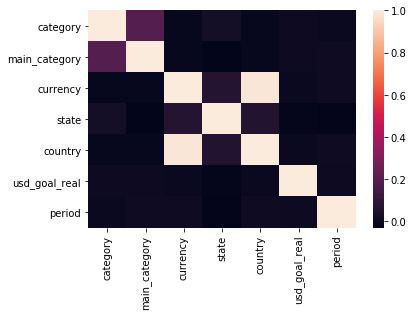

In [12]:
# ヒートマップ
sns.heatmap(df_kp.corr())

In [21]:
# ロジスティック回帰(データ件数が多いのでとりあえずランダムに1000件取ってくる)
y = df_kp['state'].sample(1000).values
X = df_kp.sample(1000).drop('state', axis=1).values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)

# 重みを取得
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]
w4 = clf.coef_[0, 3]
w5 = clf.coef_[0, 4]
w6 = clf.coef_[0, 5]
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}, w6 = {:.3f}'.format(w0, w1, w2, w3, w4, w5, w6))

w0 = 460.105, w1 = -1703.127, w2 = 374.116, w3 = -2141.837, w4 = -2325.523, w5 = -39.674, w6 = 13063.498


In [32]:
# ラベルを予測
y_pred = clf.predict(X)

print("対数尤度 = {:.3f}".format(- log_loss(y, y_pred)))

# 正答率を計算
accuracy =  accuracy_score(y, y_pred)
print('正答率（Accuracy）  = {:.3f}%'.format(100 * accuracy))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)

# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall）    = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score）    = {:.3f}%'.format(100 * f1_score[0]))

対数尤度 = -15.957
正答率（Accuracy）  = 53.800%
適合率（Precision） = 68.231%
再現率（Recall）    = 56.928%
F1値（F1-score）    = 62.069%


In [34]:
# 予測値と正解のクロス集計（混同行列）
conf_mat = confusion_matrix(y, y_pred)
conf_mat = pd.DataFrame(conf_mat, 
                        index=['正解 = 成功以外', '正解 = 成功'], 
                        columns=['予測 = 成功以外', '予測 = 成功'])
conf_mat

,予測 = 成功以外,予測 = 成功
正解 = 成功以外,378,286
正解 = 成功,176,160
